Linear Regression on stockmarket

In [1]:
from statistics import mean
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
color='#003F72'

In [2]:
def abss(x):
    if x>=0: return x
    else: return -1*x

In [3]:
#Reading the CSV file
df=pd.read_csv('stockmarket.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
#replacing all missing data with NaN value
df.replace('?',np.nan,inplace=True)

#delete all the rows that have NaN in them
dk=df.dropna()

#deleting the column with id, 1 in the argument indicates 'column', so this will delete the 'column' containing 'id'
#df.drop(['id'],1,inplace=True)


full_data=dk.values.tolist()
headers = df.dtypes.index
header=headers.tolist()

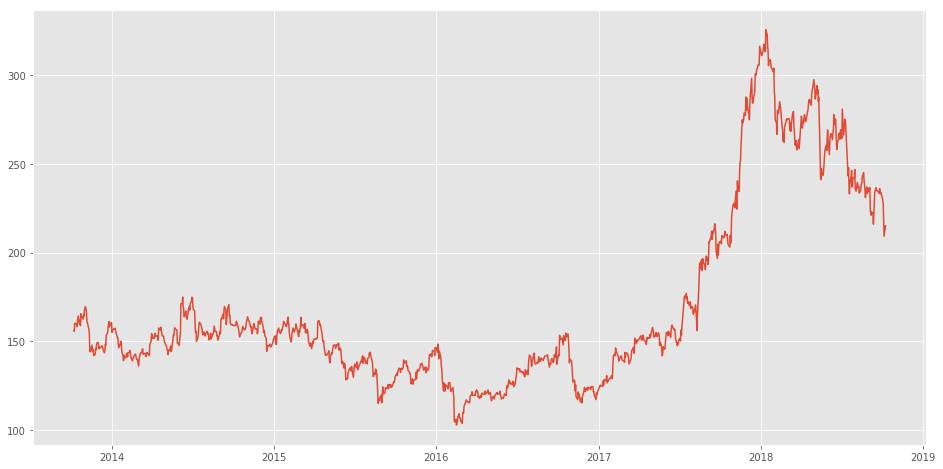

In [5]:
dk['Date'] = pd.to_datetime(dk.Date,format='%Y-%m-%d')
dk.index = dk['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dk['Close'], label='Close Price history')

In [6]:
x=np.array(dk['Date'],dtype=np.float64)
y=np.array(dk['Close'], dtype=np.float64)



In [7]:
x=[2,4,6,7,8,10,15]
y=[30,41,60,67,73,86,97]

x=np.array(x)
y=np.array(y)

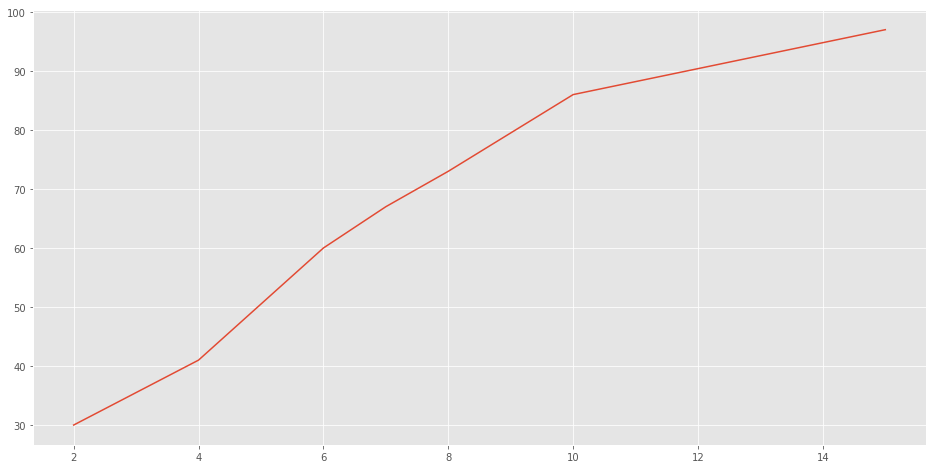

In [8]:
plt.figure(figsize=(16,8))
plt.plot(x,y)

In [9]:
def best_fit_slope_and_intercept(xs,ys):
    slope=((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)**2)-mean(xs**2))
    intercept=mean(ys)-slope*mean(xs)
    return slope,intercept

In [10]:
m,b=best_fit_slope_and_intercept(x,y)
print (m,b)

5.523809523809524 25.333333333333336


In [11]:
#calculating the predicted values using the newly found slope and intercept

regression_line=[]
for xi in x:
    regression_line.append((m*xi)+b)
#print (regression_line)

<function matplotlib.pyplot.show(*args, **kw)>

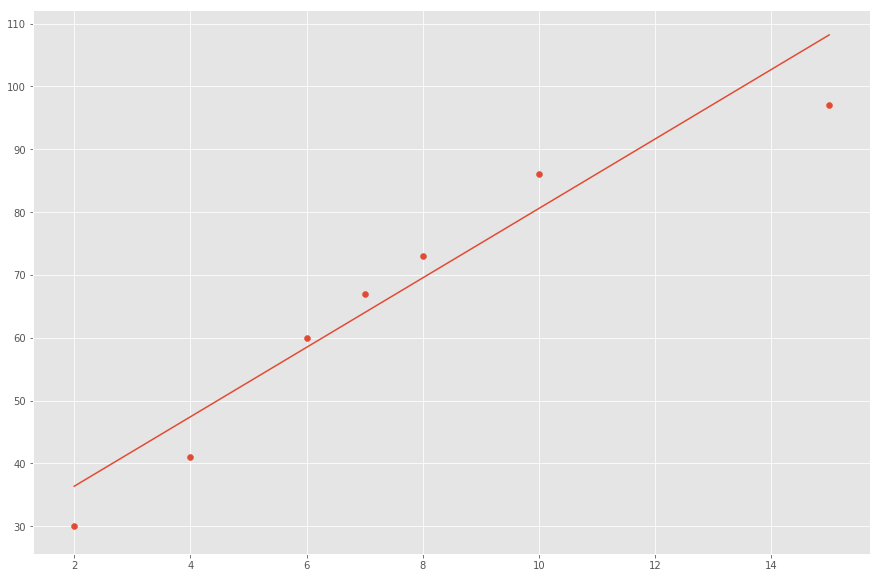

In [12]:
plt.figure(figsize=(15,10))
#plt.plot(x,y,color='#004F72')
plt.plot(x,regression_line)
plt.scatter(x,y)
plt.show

In [13]:
#Accuracy of the model

correct=0
for i in range(len(x)):
    predict=(m*x[i])+b
    if abss(y[i]-predict)<10:
        correct+=1
accuracy=float(correct)/float(len(x))*100
print (accuracy)

85.71428571428571


In [14]:
print("%s correct predictions out of %s predictions" % (correct, len(dk['Date'])))

6 correct predictions out of 1235 predictions


In [15]:
print("%s correct predictions out of %s predictions" % (correct, len(y)))

6 correct predictions out of 7 predictions
